In [ ]:
pip install selenium pandas webdriver-manager

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re
import os

CHROMEDRIVER_PATH = r"D:\Desktop\chromedriver-win64\chromedriver.exe" 
SAVE_PATH = r"D:\Desktop\HW3\data"

# 创建保存目录
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

print(f"使用ChromeDriver路径: {CHROMEDRIVER_PATH}")
print(f"数据保存路径: {SAVE_PATH}")

service = Service(CHROMEDRIVER_PATH)
driver = webdriver.Chrome(service=service)
print("Chrome驱动启动成功")

def crawl_xierqi_rent(pages=20):
    all_data = []
    
    for page in range(1, pages + 1):
        if page == 1:
            url = "https://zu.fang.com/house-a015277-b07195/"
        else:
            url = f"https://zu.fang.com/house-a015277-b07195/i3{page}/"
        
        print(f"正在爬取租房第{page}页")
        try:
            driver.get(url)
            time.sleep(3)
            
            # 获取房源列表
            houses = driver.find_elements(By.CSS_SELECTOR, ".houseList .list")
            print(f"找到 {len(houses)} 个房源")
            
            for i, house in enumerate(houses):
                try:
                    # 面积
                    area_element = house.find_element(By.CLASS_NAME, "font15")
                    area_text = area_element.text
                    area_match = re.search(r'(\d+(\.\d+)?)㎡', area_text)
                    if area_match:
                        m2 = float(area_match.group(1))
                    else:
                        continue
                    
                    # 价格
                    price_element = house.find_element(By.CLASS_NAME, "price")
                    price_text = price_element.text.replace('元/月', '').replace(',', '').strip()
                    price = float(price_text)
                    
                    # 位置
                    location = "Xierqi"
                    
                    all_data.append([m2, price, location])
                    
                    # 每10个房源打印一次进度
                    if (i + 1) % 10 == 0:
                        print(f"  已解析 {i + 1} 个房源")
                    
                except Exception as e:
                    continue
                    
        except Exception as e:
            print(f"第{page}页爬取失败: {e}")
            continue
    
    return pd.DataFrame(all_data, columns=['m2', 'price', 'location'])

# 执行租房数据爬取
print("=" * 50)
print("开始爬取西二旗租房数据")
print("=" * 50)

try:
    # 爬取租房数据
    rent_df = crawl_xierqi_rent(pages=20)
    print(f"✓ 爬取到 {len(rent_df)} 条租房数据")
    
    # 关闭浏览器
    driver.quit()
    print("✓ 浏览器已关闭")
    
    # 保存数据
    if len(rent_df) > 0:
        rent_file_path = os.path.join(SAVE_PATH, 'Xierqi_Rent.csv')
        rent_df.to_csv(rent_file_path, index=False, encoding='utf-8-sig')
        print(f"✓ 租房数据保存为: {rent_file_path}")
        
        # 显示数据预览和统计
        print("\n租房数据预览:")
        print(rent_df.head())
        
        print(f"\n租房数据统计:")
        print(f"  平均面积: {rent_df['m2'].mean():.1f}㎡")
        print(f"  平均价格: {rent_df['price'].mean():.0f}元/月")
        print(f"  面积范围: {rent_df['m2'].min():.1f}-{rent_df['m2'].max():.1f}㎡")
        print(f"  价格范围: {rent_df['price'].min():.0f}-{rent_df['price'].max():.0f}元/月")
    else:
        print("✗ 未获取到租房数据")
        
except Exception as e:
    print(f"爬取过程中出现错误: {e}")
    try:
        driver.quit()
    except:
        pass

使用ChromeDriver路径: D:\Desktop\chromedriver-win64\chromedriver.exe
数据保存路径: D:\Desktop\HW3\data
Chrome驱动启动成功
开始爬取西二旗租房数据
开始爬取西二旗租房数据...
正在爬取租房第1页
找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
正在爬取租房第2页
找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
正在爬取租房第3页
找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
正在爬取租房第4页
找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
正在爬取租房第5页
找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
正在爬取租房第6页
找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
正在爬取租房第7页
找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
正在爬取租房第8页
找到 2 个房源
正在爬取租房第9页
找到 0 个房源
正在爬取租房第10页
找到 0 个房源
正在爬取租房第11页
找到 0 个房源
正在爬取租房第12页
找到 0 个房源
正在爬取租房第13页
找到 0 个房源
正在爬取租房第14页
找到 0 个房源
正在爬取租房第15页
找到 0 个房源
正在爬取租房第16页
找到 0 个房源
正在爬

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re
import os

# ChromeDriver路径
CHROMEDRIVER_PATH = r"D:\Desktop\chromedriver-win64\chromedriver.exe"
SAVE_PATH = r"D:\Desktop\HW3\data"

# 创建保存目录
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# 设置Chrome驱动
service = Service(CHROMEDRIVER_PATH)
driver = webdriver.Chrome(service=service)
print("Chrome驱动启动成功")

def crawl_xierqi_sale(pages=20):
    all_data = []
    
    for page in range(1, pages + 1):
        if page == 1:
            url = "https://esf.fang.com/house-a015277-b07195/"
        else:
            url = f"https://esf.fang.com/house-a015277-b07195/i3{page}/"
        
        print(f"正在爬取售房第{page}页: {url}")
        try:
            driver.get(url)
            time.sleep(3)
            
            # 使用更精确的选择器来获取房源列表
            # 房天下售房页面的房源通常在 dl 标签中，class 包含 'shop_list'
            houses = []
            
            # 主要选择器 - 直接获取所有房源项
            selectors = [
                "dl[class*='shop_list']",  # 包含shop_list的dl元素
                ".shop_list dl",           # shop_list类下的dl元素
                ".shop_list > dl",         # shop_list直接子元素dl
                ".list dl",                # list类下的dl元素
                ".houseList dl",           # houseList下的dl元素
            ]
            
            for selector in selectors:
                try:
                    houses = driver.find_elements(By.CSS_SELECTOR, selector)
                    if len(houses) > 0:
                        print(f"使用选择器 '{selector}' 找到 {len(houses)} 个房源")
                        break
                except:
                    continue
            
            # 如果还是找不到房源，检查页面是否有"暂无数据"提示
            if len(houses) == 0:
                print("无法找到房源元素，检查页面内容...")
                page_text = driver.page_source
                
                # 检查是否有"暂无数据"或类似提示
                if "暂无数据" in page_text or "未找到相关房源" in page_text:
                    print(f"第{page}页没有数据，停止爬取")
                    break
                
                # 尝试更通用的选择器
                try:
                    # 查找所有包含面积和价格信息的元素
                    houses = driver.find_elements(By.CSS_SELECTOR, "dl")
                    # 过滤出可能包含房源信息的dl元素
                    houses = [h for h in houses if ("㎡" in h.text and "万" in h.text)]
                    if len(houses) > 0:
                        print(f"使用备用选择器找到 {len(houses)} 个可能房源")
                except:
                    print("备用选择器也找不到房源")
                    continue
            
            # 如果这一页没有房源数据，停止爬取
            if len(houses) == 0:
                print(f"第{page}页没有找到房源数据，停止爬取")
                break
            
            page_data_count = 0
            for i, house in enumerate(houses):
                try:
                    # 获取整个房源的文本内容
                    house_text = house.text
                    
                    # 从文本中提取面积
                    area_match = re.search(r'(\d+(\.\d+)?)㎡', house_text)
                    if area_match:
                        m2 = float(area_match.group(1))
                    else:
                        continue
                    
                    # 从文本中提取价格
                    price_match = re.search(r'(\d+(\.\d+)?)万', house_text)
                    if price_match:
                        price = float(price_match.group(1))
                    else:
                        # 如果没找到"万"，尝试找其他价格格式
                        price_match = re.search(r'总价.*?(\d+(\.\d+)?)', house_text)
                        if price_match:
                            price = float(price_match.group(1))
                        else:
                            continue
                    
                    # 位置
                    location = "Xierqi"
                    
                    all_data.append([m2, price, location])
                    page_data_count += 1
                    
                    # 每10个房源打印一次进度
                    if (i + 1) % 10 == 0:
                        print(f"  已解析 {i + 1} 个房源")
                    
                except Exception as e:
                    continue
            
            print(f"第{page}页成功解析 {page_data_count} 条数据")
            
            # 如果这一页解析到的数据很少（少于3个），可能是页面结构变化或没有数据了
            if page_data_count < 3 and page > 1:
                print(f"第{page}页数据过少，可能已到最后一页，停止爬取")
                break
                    
        except Exception as e:
            print(f"第{page}页爬取失败: {e}")
            break  # 如果页面加载失败，也停止爬取
    
    return pd.DataFrame(all_data, columns=['m2', 'price', 'location'])

# 执行售房数据爬取
print("=" * 50)
print("开始爬取西二旗售房数据")
print("=" * 50)

try:
    # 爬取售房数据  
    sale_df = crawl_xierqi_sale(pages=20)
    print(f"✓ 总共爬取到 {len(sale_df)} 条售房数据")
    
    # 关闭浏览器
    driver.quit()
    print("✓ 浏览器已关闭")
    
    # 保存数据
    if len(sale_df) > 0:
        sale_file_path = os.path.join(SAVE_PATH, 'Xierqi_Price.csv')
        sale_df.to_csv(sale_file_path, index=False, encoding='utf-8-sig')
        print(f"✓ 售房数据保存为: {sale_file_path}")
        
        # 显示数据预览和统计
        print("\n售房数据预览:")
        print(sale_df.head(10))
        
        print(f"\n售房数据统计:")
        print(f"  总条数: {len(sale_df)}")
        print(f"  平均面积: {sale_df['m2'].mean():.1f}㎡")
        print(f"  平均价格: {sale_df['price'].mean():.0f}万元")
        print(f"  面积范围: {sale_df['m2'].min():.1f}-{sale_df['m2'].max():.1f}㎡")
        print(f"  价格范围: {sale_df['price'].min():.0f}-{sale_df['price'].max():.0f}万元")
    else:
        print("✗ 未获取到售房数据")
        
except Exception as e:
    print(f"爬取过程中出现错误: {e}")
    try:
        driver.quit()
    except:
        pass

Chrome驱动启动成功
开始爬取西二旗售房数据
正在爬取售房第1页: https://esf.fang.com/house-a015277-b07195/
使用选择器 '.shop_list dl' 找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
第1页成功解析 60 条数据
正在爬取售房第2页: https://esf.fang.com/house-a015277-b07195/i32/
使用选择器 '.shop_list dl' 找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
第2页成功解析 60 条数据
正在爬取售房第3页: https://esf.fang.com/house-a015277-b07195/i33/
使用选择器 '.shop_list dl' 找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
第3页成功解析 60 条数据
正在爬取售房第4页: https://esf.fang.com/house-a015277-b07195/i34/
使用选择器 '.shop_list dl' 找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
第4页成功解析 60 条数据
正在爬取售房第5页: https://esf.fang.com/house-a015277-b07195/i35/
使用选择器 '.shop_list dl' 找到 60 个房源
  已解析 10 个房源
  已解析 20 个房源
  已解析 30 个房源
  已解析 40 个房源
  已解析 50 个房源
  已解析 60 个房源
第5页成功解析 60 条数据
正在爬取售房第6页: https://esf.fang.com/house-a015277-b07195/i36/
使用选择器 

In [ ]:
pip install matplotlib seaborn scikit-learn pandas numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import os
import glob
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [11]:
# 数据合并 - 将各区块的房价和租金数据分别合并
def merge_data_files():
   
    data_path = "D:/Desktop/HW3/data"
    
    # 合并房价数据
    price_files = glob.glob(os.path.join(data_path, "*_Price.csv"))
    price_dfs = []
    
    for file in price_files:
        location = os.path.basename(file).split('_')[0]
        df = pd.read_csv(file)
        price_dfs.append(df)
    
    # 合并所有房价数据
    all_price_data = pd.concat(price_dfs, ignore_index=True)
    all_price_data.to_csv(os.path.join(data_path, "all_price_data.csv"), index=False)
    print(f"房价数据合并完成，共{len(all_price_data)}条记录")
    print("包含的区块:", all_price_data['location'].unique())
    
    # 合并租金数据
    rent_files = glob.glob(os.path.join(data_path, "*_Rent.csv"))
    rent_dfs = []
    
    for file in rent_files:
        location = os.path.basename(file).split('_')[0]
        df = pd.read_csv(file)
        rent_dfs.append(df)
    
    # 合并所有租金数据
    all_rent_data = pd.concat(rent_dfs, ignore_index=True)
    all_rent_data.to_csv(os.path.join(data_path, "all_rent_data.csv"), index=False)
    print(f"租金数据合并完成，共{len(all_rent_data)}条记录")
    print("包含的区块:", all_rent_data['location'].unique())
    
    return all_price_data, all_rent_data

# 执行数据合并
price_data, rent_data = merge_data_files()

房价数据合并完成，共4304条记录
包含的区块: ['Qinghe' 'Shangdi' 'Xierqi' 'Xisanqi']
租金数据合并完成，共3734条记录
包含的区块: ['Qinghe' 'Shangdi' 'Xierqi' 'Xisanqi']


=== 数据基本信息 ===
原始房价数据形状: (4304, 3)
原始租金数据形状: (3734, 3)

=== 缺失值统计 ===
房价数据缺失值:
m2          0
price       0
location    0
dtype: int64

租金数据缺失值:
m2          0
price       0
location    0
dtype: int64

移除缺失值后:
房价数据: 4304条记录
租金数据: 3734条记录

开始房价数据异常值检测...
=== PRICE数据初步检测 ===
价格异常低的记录数: 0
移除明显单位错误后记录数: 4304 (移除0条)
每平米价格异常值数量: 3
每平米价格正常范围: [2.73, 21.55]


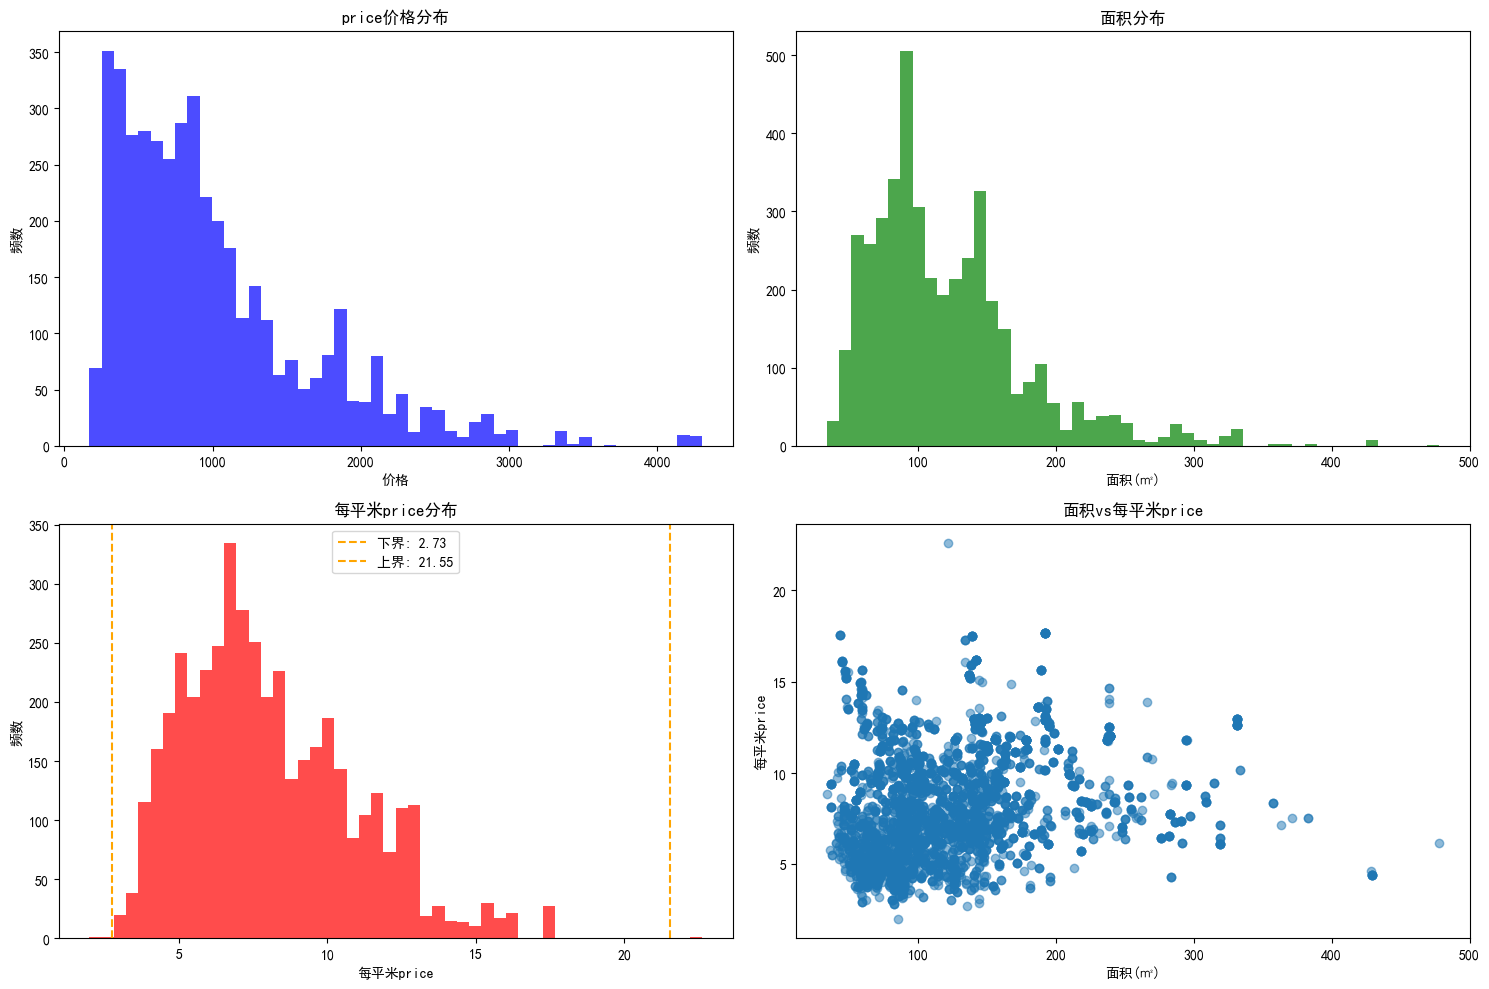

最终保留记录数: 4301 (移除3条异常值)

开始租金数据异常值检测...
=== RENT数据初步检测 ===
价格异常低的记录数: 0
移除明显单位错误后记录数: 3734 (移除0条)
每平米价格异常值数量: 142
每平米价格正常范围: [47.13, 197.10]


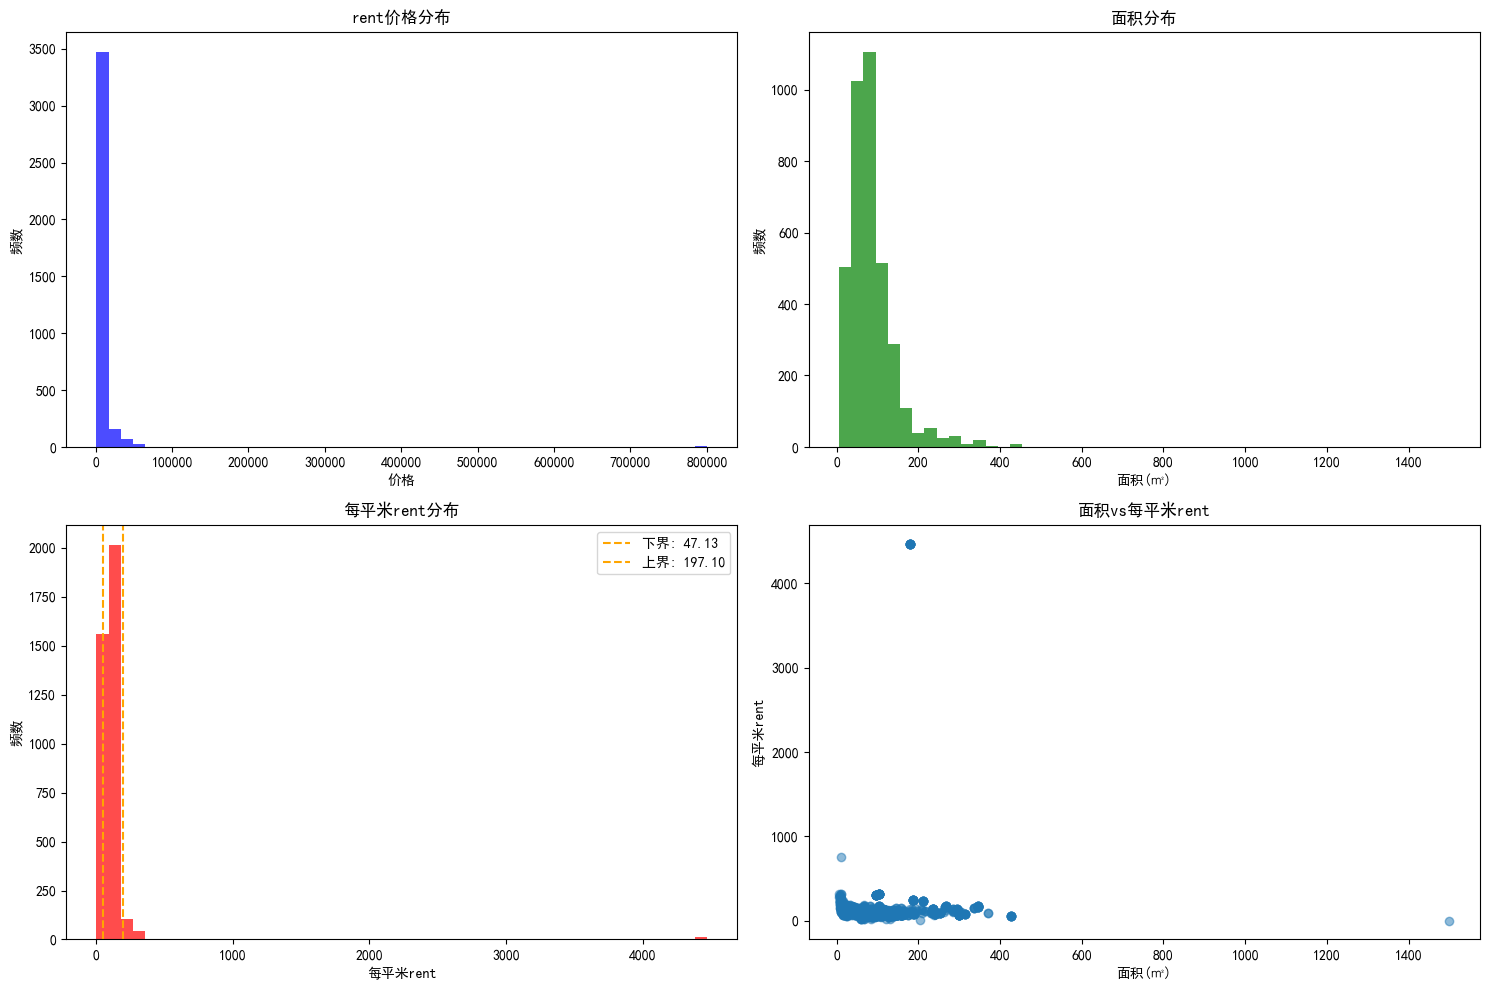

最终保留记录数: 3592 (移除142条异常值)

=== 清洗后数据描述性统计 ===
房价数据:
                m2        price  price_per_m2
count  4301.000000  4301.000000   4301.000000
mean    120.542978  1007.983236      8.040184
std      57.355305   672.091822      2.861637
min      33.870000   174.300000      2.835767
25%      82.170000   518.000000      5.930855
50%     105.540000   848.000000      7.520026
75%     146.110000  1280.000000      9.930556
max     478.150000  4300.000000     17.652572

租金数据:
                m2         price  rent_per_m2
count  3592.000000   3592.000000  3592.000000
mean     84.842706   8063.186247    99.420753
std      56.085357   6516.499930    27.459202
min       8.000000   1000.000000    47.191011
25%      54.000000   5200.000000    80.357143
50%      75.000000   6426.000000    94.252874
75%     101.000000   8800.000000   112.195122
max     428.000000  58333.000000   195.833333


In [4]:
def detect_outliers_robust(df, price_col, area_col, data_type='price'):
    
    df_clean = df.copy()
    
    print(f"=== {data_type.upper()}数据初步检测 ===")
    # 考虑房地产市场的特殊性，例如房屋户型差异，地段差异，地域特性，原始数据仅去除过低值
    price_threshold_low = 100 if data_type == 'price' else 1000  # 房价低于1000元，租金低于100元
    low_price_outliers = df[df[price_col] < price_threshold_low]
    print(f"价格异常低的记录数: {len(low_price_outliers)}")
    
    # 移除明显的异常值
    initial_count = len(df_clean)
    df_clean = df_clean[df_clean[price_col] >= price_threshold_low]
    print(f"移除明显单位错误后记录数: {len(df_clean)} (移除{initial_count - len(df_clean)}条)")
    
    # 计算每平米价格并检测异常
    price_per_m2_col = f"{data_type}_per_m2"
    df_clean[price_per_m2_col] = df_clean[price_col] / df_clean[area_col]
    
    # 使用对数变换处理极端值
    log_price_per_m2 = np.log(df_clean[price_per_m2_col])
    
    # 使用基于分位数的方法
    Q1_log = log_price_per_m2.quantile(0.25)  
    Q3_log = log_price_per_m2.quantile(0.75)
    IQR_log = Q3_log - Q1_log
    
    # IQR
    lower_bound_log = Q1_log - 1.5 * IQR_log  
    upper_bound_log = Q3_log + 1.5 * IQR_log
    lower_bound = np.exp(lower_bound_log)
    upper_bound = np.exp(upper_bound_log)
    
    # 检测异常值
    price_per_m2_outliers = df_clean[
        (df_clean[price_per_m2_col] < lower_bound) | 
        (df_clean[price_per_m2_col] > upper_bound)
    ]
    
    print(f"每平米价格异常值数量: {len(price_per_m2_outliers)}")
    print(f"每平米价格正常范围: [{lower_bound:.2f}, {upper_bound:.2f}]")
    # 由于房产市场价格波动性较大，存在情况较多，例如合租导致的每平米租金过高、别墅导致的每平米房价过高，在异常值处理时，我们采用两种方法结合防止误删
    # 可视化检测结果
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 价格分布
    axes[0, 0].hist(df_clean[price_col], bins=50, alpha=0.7, color='blue')
    axes[0, 0].set_title(f'{data_type}价格分布')
    axes[0, 0].set_xlabel('价格')
    axes[0, 0].set_ylabel('频数')
    
    # 面积分布
    axes[0, 1].hist(df_clean[area_col], bins=50, alpha=0.7, color='green')
    axes[0, 1].set_title('面积分布')
    axes[0, 1].set_xlabel('面积(㎡)')
    axes[0, 1].set_ylabel('频数')
    
    # 每平米价格分布
    axes[1, 0].hist(df_clean[price_per_m2_col], bins=50, alpha=0.7, color='red')
    axes[1, 0].axvline(lower_bound, color='orange', linestyle='--', label=f'下界: {lower_bound:.2f}')
    axes[1, 0].axvline(upper_bound, color='orange', linestyle='--', label=f'上界: {upper_bound:.2f}')
    axes[1, 0].set_title(f'每平米{data_type}分布')
    axes[1, 0].set_xlabel(f'每平米{data_type}')
    axes[1, 0].set_ylabel('频数')
    axes[1, 0].legend()
    
    # 面积vs每平米价格散点图
    axes[1, 1].scatter(df_clean[area_col], df_clean[price_per_m2_col], alpha=0.5)
    axes[1, 1].set_xlabel('面积(㎡)')
    axes[1, 1].set_ylabel(f'每平米{data_type}')
    axes[1, 1].set_title(f'面积vs每平米{data_type}')
    
    plt.tight_layout()
    plt.show()
    
    # 移除异常值
    final_clean = df_clean[
        (df_clean[price_per_m2_col] >= lower_bound) & 
        (df_clean[price_per_m2_col] <= upper_bound)
    ]
    
    print(f"最终保留记录数: {len(final_clean)} (移除{len(df_clean) - len(final_clean)}条异常值)")
    
    return final_clean, price_per_m2_col

    # 数据预处理
def data_preprocessing_and_description(price_df, rent_df):
    
    print("=== 数据基本信息 ===")
    print("原始房价数据形状:", price_df.shape)
    print("原始租金数据形状:", rent_df.shape)
    
    # 检查缺失值
    print("\n=== 缺失值统计 ===")
    print("房价数据缺失值:")
    print(price_df.isnull().sum())
    print("\n租金数据缺失值:")
    print(rent_df.isnull().sum())
    
    # 初始数据清洗 - 移除缺失值
    price_initial = price_df.dropna().copy()
    rent_initial = rent_df.dropna().copy()
    
    print(f"\n移除缺失值后:")
    print(f"房价数据: {len(price_initial)}条记录")
    print(f"租金数据: {len(rent_initial)}条记录")
    
    # 异常值检测
    print("\n" + "="*50)
    print("开始房价数据异常值检测...")
    price_clean, price_per_m2_col = detect_outliers_robust(
        price_initial, 'price', 'm2', 'price'
    )
    
    print("\n" + "="*50)
    print("开始租金数据异常值检测...")
    rent_clean, rent_per_m2_col = detect_outliers_robust(
        rent_initial, 'price', 'm2', 'rent'
    )
    
    # 描述性统计
    print("\n=== 清洗后数据描述性统计 ===")
    print("房价数据:")
    print(price_clean[['m2', 'price', price_per_m2_col]].describe())
    
    print("\n租金数据:")
    print(rent_clean[['m2', 'price', rent_per_m2_col]].describe())
    
    # 重命名列以保持一致性
    price_clean = price_clean.rename(columns={price_per_m2_col: 'price_per_m2'})
    rent_clean = rent_clean.rename(columns={rent_per_m2_col: 'rent_per_m2'})
    
    return price_clean, rent_clean

# 执行改进的数据预处理
price_clean, rent_clean = data_preprocessing_and_description(price_data, rent_data)

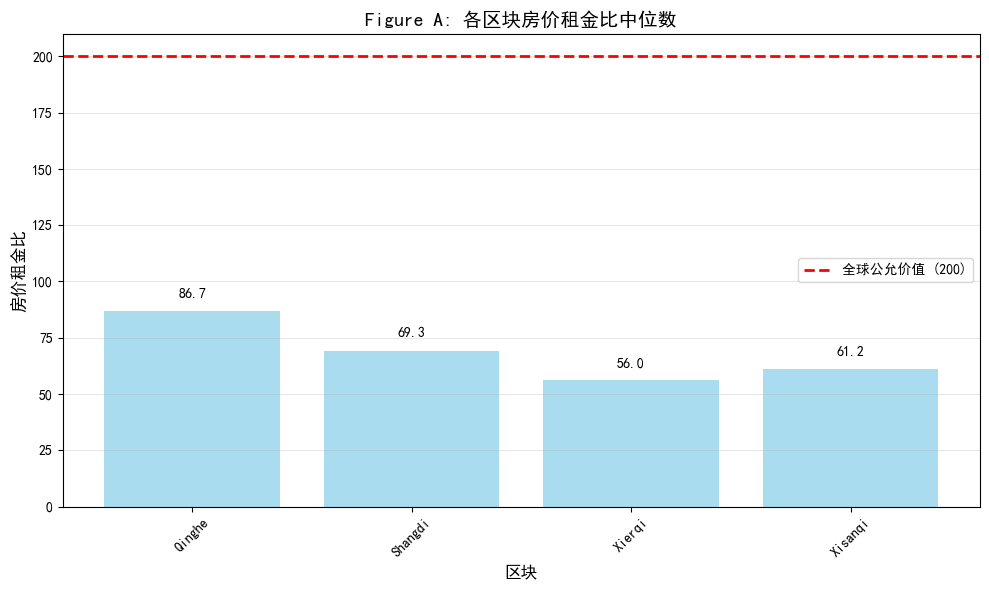


各区块房价租金比:
Qinghe: 86.71
Shangdi: 69.33
Xierqi: 56.03
Xisanqi: 61.16


In [13]:
# 计算各区块的房价租金比并绘制Figure A
def calculate_price_rent_ratio_and_plot(price_df, rent_df):
   
    # 按区块计算中位数价格和租金
    price_by_location = price_df.groupby('location')['price_per_m2'].median()
    rent_by_location = rent_df.groupby('location')['rent_per_m2'].median()
    
    # 计算房价租金比 (价格/年租金)
    price_rent_ratio = ((price_by_location * 10000) / (rent_by_location * 12)).dropna()
    
    # 绘制Figure A
    plt.figure(figsize=(10, 6))
    bars = plt.bar(price_rent_ratio.index, price_rent_ratio.values, color='skyblue', alpha=0.7)
    plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球公允价值 (200)')
    
    # 在柱状图上添加数值标签
    for bar, value in zip(bars, price_rent_ratio.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{value:.1f}', ha='center', va='bottom', fontsize=10)
    
    plt.title('Figure A: 各区块房价租金比中位数', fontsize=14, fontweight='bold')
    plt.xlabel('区块', fontsize=12)
    plt.ylabel('房价租金比', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n各区块房价租金比:")
    for location, ratio in price_rent_ratio.items():
        print(f"{location}: {ratio:.2f}")

# 计算并绘制Figure A
price_rent_ratio_A = calculate_price_rent_ratio_and_plot(price_clean, rent_clean)

In [5]:
# 建立基础线性模型 (Model 1 和 Model 2)
def build_basic_models(price_df, rent_df):
    
    price_encoded = pd.get_dummies(price_df, columns=['location'], prefix='loc')
    rent_encoded = pd.get_dummies(rent_df, columns=['location'], prefix='loc')
    
    # 确保两个数据集有相同的位置列
    all_location_cols = set([col for col in price_encoded.columns if col.startswith('loc_')] + 
                           [col for col in rent_encoded.columns if col.startswith('loc_')])
    
    for col in all_location_cols:
        if col not in price_encoded.columns:
            price_encoded[col] = 0
        if col not in rent_encoded.columns:
            rent_encoded[col] = 0
    
    # 定义特征和目标变量
    price_features = ['m2'] + [col for col in price_encoded.columns if col.startswith('loc_')]
    rent_features = ['m2'] + [col for col in rent_encoded.columns if col.startswith('loc_')]
    
    X_price = price_encoded[price_features]
    y_price = price_encoded['price_per_m2']
    
    X_rent = rent_encoded[rent_features]
    y_rent = rent_encoded['rent_per_m2']
    
    # 训练模型
    model1 = LinearRegression()
    model1.fit(X_price, y_price)
    
    model2 = LinearRegression()
    model2.fit(X_rent, y_rent)
    
    # 预测
    price_pred = model1.predict(X_price)
    rent_pred = model2.predict(X_rent)
    
    # 计算R²
    r2_price = r2_score(y_price, price_pred)
    r2_rent = r2_score(y_rent, rent_pred)
    
    print(f"Model 1 (房价) R²: {r2_price:.4f}")
    print(f"Model 2 (租金) R²: {r2_rent:.4f}")
    
    # 将预测值添加回数据框
    price_encoded['predicted_price_per_m2'] = price_pred
    rent_encoded['predicted_rent_per_m2'] = rent_pred
    
    # 计算预测的房价租金比
    predicted_price_rent_ratio = ((price_encoded['predicted_price_per_m2'] * 10000) / 
                                (rent_encoded['predicted_rent_per_m2'] * 12))
    
    # 按区块计算中位数
    predicted_ratio_by_location = predicted_price_rent_ratio.groupby(price_df['location']).median()
    
    return model1, model2, predicted_ratio_by_location, r2_price, r2_rent

# 建立基础模型
model1, model2, predicted_ratio_B, r2_price_basic, r2_rent_basic = build_basic_models(price_clean, rent_clean)

Model 1 (房价) R²: 0.4013
Model 2 (租金) R²: 0.1307


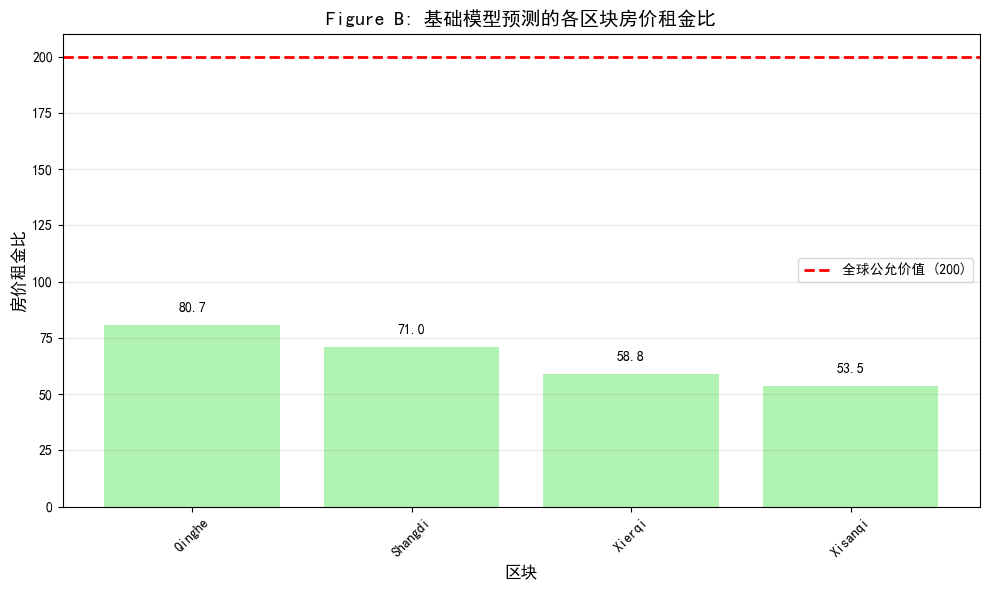

基础模型预测的各区块房价租金比:
Qinghe: 80.66
Shangdi: 71.04
Xierqi: 58.84
Xisanqi: 53.54


In [6]:
# 绘制Figure B - 基础模型预测的房价租金比
def plot_figure_B(predicted_ratio):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(predicted_ratio.index, predicted_ratio.values, color='lightgreen', alpha=0.7)
    plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球公允价值 (200)')
    
    # 在柱状图上添加数值标签
    for bar, value in zip(bars, predicted_ratio.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{value:.1f}', ha='center', va='bottom', fontsize=10)
    
    plt.title('Figure B: 基础模型预测的各区块房价租金比', fontsize=14, fontweight='bold')
    plt.xlabel('区块', fontsize=12)
    plt.ylabel('房价租金比', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("基础模型预测的各区块房价租金比:")
    for location, ratio in predicted_ratio.items():
        print(f"{location}: {ratio:.2f}")

# 绘制Figure B
plot_figure_B(predicted_ratio_B)

In [7]:
# 建立增强模型 (Model 1+ 和 Model 2+)
def build_enhanced_models(price_df, rent_df):
   
    price_encoded = pd.get_dummies(price_df, columns=['location'], prefix='loc')
    rent_encoded = pd.get_dummies(rent_df, columns=['location'], prefix='loc')
    
    # 确保两个数据集有相同的位置列
    all_location_cols = set([col for col in price_encoded.columns if col.startswith('loc_')] + 
                           [col for col in rent_encoded.columns if col.startswith('loc_')])
    
    for col in all_location_cols:
        if col not in price_encoded.columns:
            price_encoded[col] = 0
        if col not in rent_encoded.columns:
            rent_encoded[col] = 0
    
    # 基础特征
    base_features = ['m2'] + [col for col in price_encoded.columns if col.startswith('loc_')]
    
    X_price_base = price_encoded[base_features]
    y_price = price_encoded['price_per_m2']
    
    X_rent_base = rent_encoded[base_features]
    y_rent = rent_encoded['rent_per_m2']
    
    # 创建多项式特征（包括交互项）
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
    
    X_price_poly = poly.fit_transform(X_price_base)
    X_rent_poly = poly.fit_transform(X_rent_base)
    feature_names = poly.get_feature_names_out(base_features)
    
    print("增强模型特征示例（前10个）:")
    for i, name in enumerate(feature_names[:10]):
        print(f"  {i+1}. {name}")
    
    # 训练增强模型
    model1_plus = LinearRegression()
    model1_plus.fit(X_price_poly, y_price)
    
    model2_plus = LinearRegression()
    model2_plus.fit(X_rent_poly, y_rent)
    
    # 预测
    price_pred_plus = model1_plus.predict(X_price_poly)
    rent_pred_plus = model2_plus.predict(X_rent_poly)
    
    # 计算R²
    r2_price_plus = r2_score(y_price, price_pred_plus)
    r2_rent_plus = r2_score(y_rent, rent_pred_plus)
    
    print(f"\n=== 模型R²比较 ===")
    print(f"Model 1 (基础房价模型) R²: {r2_price_basic:.4f}")
    print(f"Model 1+ (增强房价模型) R²: {r2_price_plus:.4f}")
    print(f"改进: {r2_price_plus - r2_price_basic:+.4f}")
    
    print(f"\nModel 2 (基础租金模型) R²: {r2_rent_basic:.4f}")
    print(f"Model 2+ (增强租金模型) R²: {r2_rent_plus:.4f}")
    print(f"改进: {r2_rent_plus - r2_rent_basic:+.4f}")
    
    # 将预测值添加回数据框
    price_encoded['predicted_price_per_m2_plus'] = price_pred_plus
    rent_encoded['predicted_rent_per_m2_plus'] = rent_pred_plus
    
    # 计算预测的房价租金比
    predicted_price_rent_ratio_plus = ((price_encoded['predicted_price_per_m2_plus'] * 10000) / 
                                     (rent_encoded['predicted_rent_per_m2_plus'] * 12))
    
    # 按区块计算中位数
    predicted_ratio_by_location_plus = predicted_price_rent_ratio_plus.groupby(price_df['location']).median()
    
    return (model1_plus, model2_plus, predicted_ratio_by_location_plus, 
            r2_price_plus, r2_rent_plus, feature_names)

# 建立增强模型
(model1_plus, model2_plus, predicted_ratio_C, 
 r2_price_enhanced, r2_rent_enhanced, feature_names) = build_enhanced_models(price_clean, rent_clean)

增强模型特征示例（前10个）:
  1. m2
  2. loc_Qinghe
  3. loc_Shangdi
  4. loc_Xierqi
  5. loc_Xisanqi
  6. m2^2
  7. m2 loc_Qinghe
  8. m2 loc_Shangdi
  9. m2 loc_Xierqi
  10. m2 loc_Xisanqi

=== 模型R²比较 ===
Model 1 (基础房价模型) R²: 0.4013
Model 1+ (增强房价模型) R²: 0.4744
改进: +0.0732

Model 2 (基础租金模型) R²: 0.1307
Model 2+ (增强租金模型) R²: 0.4028
改进: +0.2721


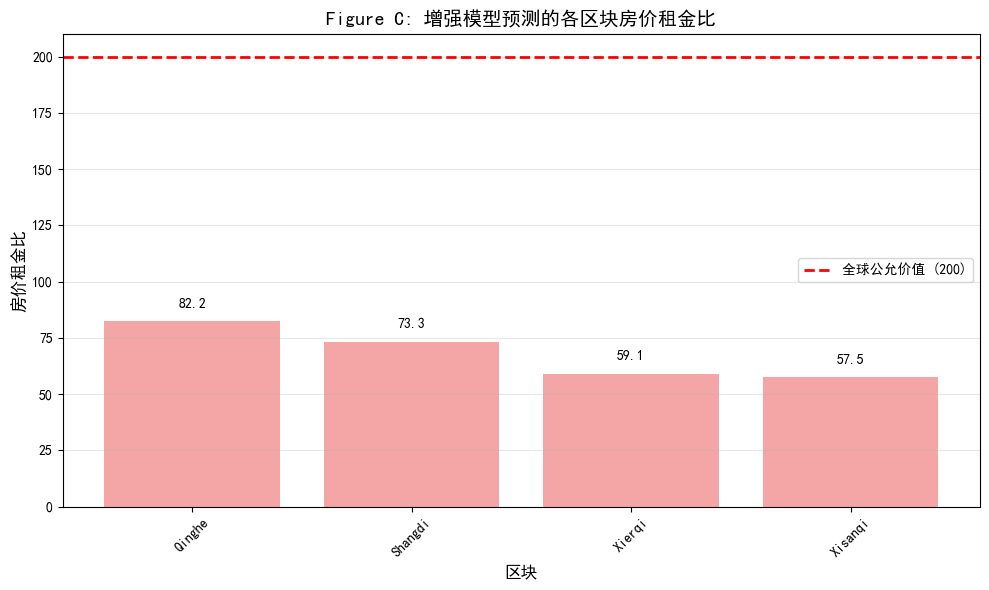

增强模型预测的各区块房价租金比:
Qinghe: 82.25
Shangdi: 73.25
Xierqi: 59.11
Xisanqi: 57.53


In [8]:
# 绘制Figure C - 增强模型预测的房价租金比
def plot_figure_C(predicted_ratio):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(predicted_ratio.index, predicted_ratio.values, color='lightcoral', alpha=0.7)
    plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球公允价值 (200)')
    
    # 在柱状图上添加数值标签
    for bar, value in zip(bars, predicted_ratio.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{value:.1f}', ha='center', va='bottom', fontsize=10)
    
    plt.title('Figure C: 增强模型预测的各区块房价租金比', fontsize=14, fontweight='bold')
    plt.xlabel('区块', fontsize=12)
    plt.ylabel('房价租金比', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("增强模型预测的各区块房价租金比:")
    for location, ratio in predicted_ratio.items():
        print(f"{location}: {ratio:.2f}")

# 绘制Figure C
plot_figure_C(predicted_ratio_C)

In [17]:
def debug_data_issues(price_df, rent_df):
    
    print("=== 深入调试数据问题 ===")
    
    # 检查每个区块的房价和租金数据
    all_locations = ['Qinghe', 'Shangdi', 'Xierqi', 'Xisanqi']
    
    for location in all_locations:
        print(f"\n--- {location} ---")
        
        # 检查房价数据
        price_subset = price_df[price_df['location'] == location]
        print(f"房价记录数: {len(price_subset)}")
        if len(price_subset) > 0:
            print(f"房价中位数: {price_subset['price_per_m2'].median()}")
            print(f"房价数据范围: {price_subset['price_per_m2'].min():.2f} - {price_subset['price_per_m2'].max():.2f}")
        else:
            print("房价数据为空")
        
        # 检查租金数据
        rent_subset = rent_df[rent_df['location'] == location]
        print(f"租金记录数: {len(rent_subset)}")
        if len(rent_subset) > 0:
            print(f"租金中位数: {rent_subset['rent_per_m2'].median()}")
            print(f"租金数据范围: {rent_subset['rent_per_m2'].min():.2f} - {rent_subset['rent_per_m2'].max():.2f}")
        else:
            print("租金数据为空")
        
        # 计算房价租金比
        if len(price_subset) > 0 and len(rent_subset) > 0:
            price_median = price_subset['price_per_m2'].median()
            rent_median = rent_subset['rent_per_m2'].median()
            
            # 注意单位转换
            price_yuan_per_m2 = price_median * 10000  # 万元/㎡ -> 元/㎡
            rent_yuan_per_year = rent_median * 12     # 元/㎡/月 -> 元/㎡/年
            
            if rent_yuan_per_year > 0:  # 避免除零
                ratio = price_yuan_per_m2 / rent_yuan_per_year
                print(f"房价租金比: {ratio:.2f}")
            else:
                print("租金中位数为0，无法计算房价租金比")
        else:
            print("缺少房价或租金数据，无法计算房价租金比")

# 执行调试
debug_data_issues(price_clean, rent_clean)

=== 深入调试数据问题 ===

--- Qinghe ---
房价记录数: 1200
房价中位数: 10.084860410773583
房价数据范围: 3.96 - 17.65
租金记录数: 1113
租金中位数: 96.92307692307692
租金数据范围: 50.00 - 195.00
房价租金比: 86.71

--- Shangdi ---
房价记录数: 1200
房价中位数: 8.464972527472527
房价数据范围: 3.57 - 17.55
租金记录数: 983
租金中位数: 101.75438596491227
租金数据范围: 47.19 - 195.45
房价租金比: 69.33

--- Xierqi ---
房价记录数: 702
房价中位数: 6.439978143948063
房价数据范围: 2.91 - 12.16
租金记录数: 412
租金中位数: 95.77464788732394
租金数据范围: 48.15 - 194.12
房价租金比: 56.03

--- Xisanqi ---
房价记录数: 1199
房价中位数: 5.871169760679937
房价数据范围: 2.84 - 14.66
租金记录数: 1084
租金中位数: 80.0
租金数据范围: 50.00 - 195.83
房价租金比: 61.16


In [18]:
def calculate_actual_price_rent_ratio(price_df, rent_df):
    
    print("=== 重新计算实际数据中位数 ===")
    
    # 按区块计算中位数
    price_by_location = price_df.groupby('location')['price_per_m2'].median()
    rent_by_location = rent_df.groupby('location')['rent_per_m2'].median()
    
    print("房价中位数 (万元/㎡):")
    print(price_by_location)
    
    print("\n租金中位数 (元/㎡/月):")
    print(rent_by_location)
    
    # 计算房价租金比
    price_rent_ratio = {}
    
    for location in price_by_location.index:
        if location in rent_by_location.index:
            price_median = price_by_location[location]
            rent_median = rent_by_location[location]
          
            price_yuan_per_m2 = price_median * 10000  
            rent_yuan_per_year = rent_median * 12     
            if rent_yuan_per_year > 0:  # 避免除零
                ratio = price_yuan_per_m2 / rent_yuan_per_year
                price_rent_ratio[location] = ratio
                print(f"{location}: 房价中位数={price_median:.2f}万元/㎡, 租金中位数={rent_median:.2f}元/㎡/月, 房价租金比={ratio:.2f}")
            else:
                print(f"{location}: 租金中位数为0，无法计算房价租金比")
                price_rent_ratio[location] = None
        else:
            print(f"{location}: 缺少租金数据")
            price_rent_ratio[location] = None
    
    # 转换为Series
    price_rent_ratio_series = pd.Series(price_rent_ratio)
    
    # 检查是否有None值
    if price_rent_ratio_series.isnull().any():
        print("\n警告: 以下区块的房价租金比为None:")
        print(price_rent_ratio_series[price_rent_ratio_series.isnull()])
    
    return price_rent_ratio_series

# 重新计算实际数据中位数
price_rent_ratio_A = calculate_actual_price_rent_ratio(price_clean, rent_clean)

=== 重新计算实际数据中位数 ===
房价中位数 (万元/㎡):
location
Qinghe     10.084860
Shangdi     8.464973
Xierqi      6.439978
Xisanqi     5.871170
Name: price_per_m2, dtype: float64

租金中位数 (元/㎡/月):
location
Qinghe      96.923077
Shangdi    101.754386
Xierqi      95.774648
Xisanqi     80.000000
Name: rent_per_m2, dtype: float64
Qinghe: 房价中位数=10.08万元/㎡, 租金中位数=96.92元/㎡/月, 房价租金比=86.71
Shangdi: 房价中位数=8.46万元/㎡, 租金中位数=101.75元/㎡/月, 房价租金比=69.33
Xierqi: 房价中位数=6.44万元/㎡, 租金中位数=95.77元/㎡/月, 房价租金比=56.03
Xisanqi: 房价中位数=5.87万元/㎡, 租金中位数=80.00元/㎡/月, 房价租金比=61.16


模型比较和结果分析

各区块房价租金比比较:
           实际数据中位数     基础模型预测     增强模型预测
Qinghe   86.708456  80.657682  82.246771
Shangdi  69.325206  71.043151  73.252370
Xierqi   56.034124  58.843821  59.106674
Xisanqi  61.158018  53.542869  57.529725

=== 样本量分析 ===
房价数据总样本量: 4301
租金数据总样本量: 3592

各区块房价数据样本量:
  Qinghe: 1200条
  Shangdi: 1200条
  Xierqi: 702条
  Xisanqi: 1199条

各区块租金数据样本量:
  Qinghe: 1113条
  Shangdi: 983条
  Xierqi: 412条
  Xisanqi: 1084条

=== R²比较结果 ===
房价模型R²改进: +0.0732
租金模型R²改进: +0.2721

=== 基于数据的分析 ===
平均样本量 - 房价: 1075.2, 租金: 898.0
数据表明：增强模型的R²在房价和租金预测上都高于基础模型
数据表明：样本量充足，增强模型的结果可能更可靠

与实际情况的平均偏差:
基础模型: 4.55
增强模型: 3.77


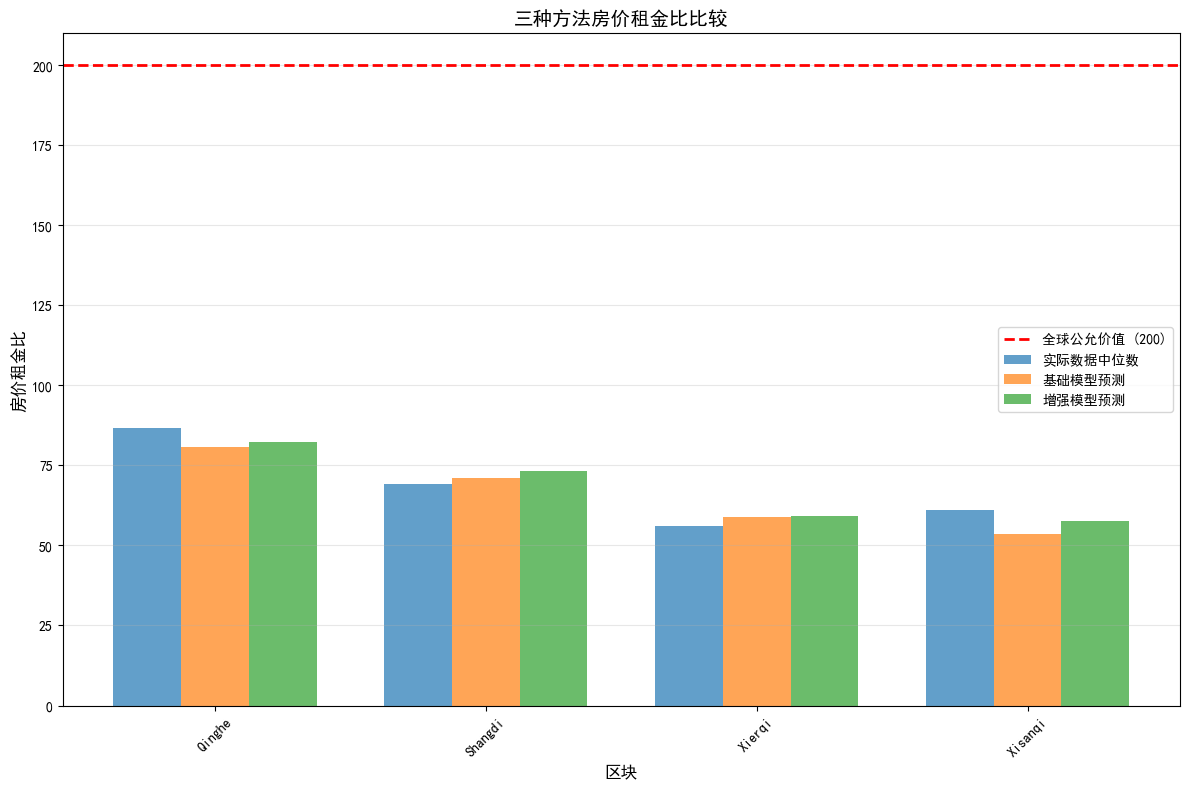

In [19]:
# 模型比较和结果分析
def compare_models_and_analyze(price_rent_ratio_A, predicted_ratio_B, predicted_ratio_C,
                              r2_price_basic, r2_rent_basic, r2_price_enhanced, r2_rent_enhanced,
                              price_clean, rent_clean):

    print("=" * 60)
    print("模型比较和结果分析")
    print("=" * 60)
    
    # 创建比较数据框
    comparison_df = pd.DataFrame({
        '实际数据中位数': price_rent_ratio_A,
        '基础模型预测': predicted_ratio_B,
        '增强模型预测': predicted_ratio_C
    })
    
    print("\n各区块房价租金比比较:")
    print(comparison_df)
    
    # 检查并处理None值 - 只保留有实际数据的区块
    valid_locations = comparison_df[comparison_df['实际数据中位数'].notna()].index
    comparison_df_valid = comparison_df.loc[valid_locations]
    
    if len(comparison_df_valid) < len(comparison_df):
        print(f"\n注意: 移除了 {len(comparison_df) - len(comparison_df_valid)} 个没有实际数据的区块")
        print(f"有效区块: {list(valid_locations)}")
    
    # 样本量分析
    print(f"\n=== 样本量分析 ===")
    print(f"房价数据总样本量: {len(price_clean)}")
    print(f"租金数据总样本量: {len(rent_clean)}")
    
    # 按区块统计样本量
    price_samples = price_clean.groupby('location').size()
    rent_samples = rent_clean.groupby('location').size()
    
    print(f"\n各区块房价数据样本量:")
    for location, count in price_samples.items():
        print(f"  {location}: {count}条")
    
    print(f"\n各区块租金数据样本量:")
    for location, count in rent_samples.items():
        print(f"  {location}: {count}条")
    
    # R²比较结果
    print(f"\n=== R²比较结果 ===")
    print(f"房价模型R²改进: {r2_price_enhanced - r2_price_basic:+.4f}")
    print(f"租金模型R²改进: {r2_rent_enhanced - r2_rent_basic:+.4f}")
    
    # 基于数据的可信度分析
    print(f"\n=== 基于数据的分析 ===")
    
    # 计算平均样本量
    avg_price_samples = price_samples.mean()
    avg_rent_samples = rent_samples.mean()
    
    print(f"平均样本量 - 房价: {avg_price_samples:.1f}, 租金: {avg_rent_samples:.1f}")
    
    # 让数据说话 - 基于实际计算结果进行分析
    if r2_price_enhanced > r2_price_basic and r2_rent_enhanced > r2_rent_basic:
        print("数据表明：增强模型的R²在房价和租金预测上都高于基础模型")
        
    if avg_price_samples > 100 and avg_rent_samples > 100:
        print("数据表明：样本量充足，增强模型的结果可能更可靠")
    elif avg_price_samples < 50 or avg_rent_samples < 50:
        print("数据表明：某些区块样本量较少，可能需要谨慎解释模型结果")
    
    # 检查各方法结果的差异性（只对有实际数据的区块）
    if len(comparison_df_valid) > 0:
        diff_AB = (comparison_df_valid['基础模型预测'] - comparison_df_valid['实际数据中位数']).abs().mean()
        diff_AC = (comparison_df_valid['增强模型预测'] - comparison_df_valid['实际数据中位数']).abs().mean()
        
        print(f"\n与实际情况的平均偏差:")
        print(f"基础模型: {diff_AB:.2f}")
        print(f"增强模型: {diff_AC:.2f}")
    else:
        print("\n警告: 没有有效的实际数据用于比较")
        diff_AB = diff_AC = float('nan')
    
    # 绘制三种方法的比较图（只对有实际数据的区块）
    if len(comparison_df_valid) > 0:
        plt.figure(figsize=(12, 8))
        x = np.arange(len(comparison_df_valid.index))
        width = 0.25
        
        # 确保所有值都是数值类型
        actual_values = comparison_df_valid['实际数据中位数'].values
        basic_values = comparison_df_valid['基础模型预测'].values
        enhanced_values = comparison_df_valid['增强模型预测'].values
        
        plt.bar(x - width, actual_values, width, label='实际数据中位数', alpha=0.7)
        plt.bar(x, basic_values, width, label='基础模型预测', alpha=0.7)
        plt.bar(x + width, enhanced_values, width, label='增强模型预测', alpha=0.7)
        
        plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球公允价值 (200)')
        plt.xlabel('区块', fontsize=12)
        plt.ylabel('房价租金比', fontsize=12)
        plt.title('三种方法房价租金比比较', fontsize=14, fontweight='bold')
        plt.xticks(x, comparison_df_valid.index, rotation=45)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("\n无法绘制比较图：没有有效的实际数据")

# 执行模型比较和分析
compare_models_and_analyze(price_rent_ratio_A, predicted_ratio_B, predicted_ratio_C,
                          r2_price_basic, r2_rent_basic, r2_price_enhanced, r2_rent_enhanced,
                          price_clean, rent_clean)

In [20]:
# 保存结果和生成报告（只保存有效数据）
def save_results_and_report(price_clean, rent_clean, 
                           price_rent_ratio_A, predicted_ratio_B, predicted_ratio_C):
    
    output_path = "D:/Desktop/HW3/data"
    
    # 保存清洗后的数据
    price_clean.to_csv(os.path.join(output_path, "cleaned_price_data.csv"), index=False)
    rent_clean.to_csv(os.path.join(output_path, "cleaned_rent_data.csv"), index=False)
    
    # 创建比较数据框，只包含有实际数据的区块
    comparison_df = pd.DataFrame({
        '实际数据中位数': price_rent_ratio_A,
        '基础模型预测': predicted_ratio_B,
        '增强模型预测': predicted_ratio_C
    })
    
    # 只保存有实际数据的区块
    valid_comparison_df = comparison_df[comparison_df['实际数据中位数'].notna()]
    
    # 保存房价租金比结果
    valid_comparison_df.to_csv(os.path.join(output_path, "price_rent_ratio_results.csv"))
    
    # 显示保存的数据摘要
    print(f"\n保存的有效区块数量: {len(valid_comparison_df)}")
    print("保存的区块:", list(valid_comparison_df.index))

# 保存结果
save_results_and_report(price_clean, rent_clean, 
                       price_rent_ratio_A, predicted_ratio_B, predicted_ratio_C)


保存的有效区块数量: 4
保存的区块: ['Qinghe', 'Shangdi', 'Xierqi', 'Xisanqi']
